dtm..............   (0, 2)	1
  (0, 4)	1
  (0, 6)	1
  (1, 7)	1
  (1, 8)	1
  (2, 7)	1
  (2, 10)	1
  (3, 1)	1
  (3, 2)	1
  (3, 9)	1
  (4, 3)	1
  (4, 4)	1
  (4, 6)	1
  (4, 8)	1
  (5, 0)	1
  (5, 5)	1
  (6, 0)	1
  (6, 3)	1
  (6, 11)	1
                                      cricket  data  fun  great  learning  \
Machine learning is very fun                0     0    1      0         1   
Python is very, very nice                   0     0    0      0         0   
Statistics is nice, too                     0     0    0      0         0   
Data science is fun                         0     1    1      0         0   
Python is great for machine learning        0     0    0      1         1   
I like Cricket                              1     0    0      0         0   
Cricket is great to watch                   1     0    0      1         0   

                                      like  machine  nice  python  science  \
Machine learning is very fun             0        1     0       0        0  

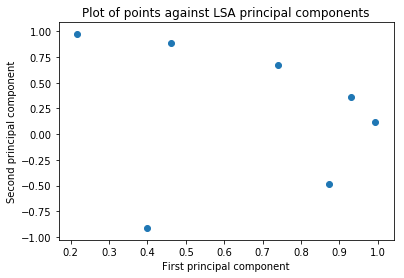

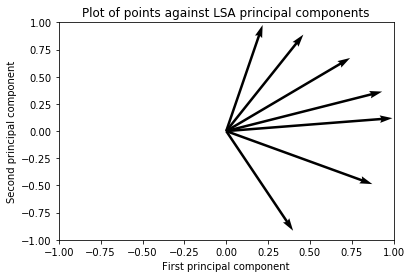

In [7]:
# anilkumar.ganesh@wipro.com
import sklearn
# Import all of the scikit learn stuff
from __future__ import print_function
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd
import warnings
# Suppress warnings from pandas library
warnings.filterwarnings("ignore", category=DeprecationWarning, module="pandas", lineno=570)

import numpy
import numpy as np
example = ["Machine learning is very fun", "Python is very, very nice", "Statistics is nice, too", "Data science is fun",
"Python is great for machine learning", "I like Cricket", "Cricket is great to watch"]
vectorizer = CountVectorizer(min_df = 1, stop_words = 'english')
bow_transformer = vectorizer.fit(example)
dtm = bow_transformer.transform(example)
print ('dtm..............',dtm)
print(pd.DataFrame(dtm.toarray(),index=example,columns=vectorizer.get_feature_names()).head(10))

# Get words that correspond to each column
vectorizer.get_feature_names()

# Fit LSA. Use algorithm = “randomized” for large datasets
lsa = TruncatedSVD(2)
dtm_lsa = lsa.fit_transform(dtm)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

print(pd.DataFrame(lsa.components_,index = ["component_1","component_2"],columns = vectorizer.get_feature_names()))
print(pd.DataFrame(dtm_lsa, index = example, columns = ["component_1","component_2"]))

xs = [w[0] for w in dtm_lsa]
ys = [w[1] for w in dtm_lsa]
print (xs, ys)




print ("@@@@@@@@@@@@@")
# Compute document similarity using LSA components
similarity = np.asarray(numpy.asmatrix(dtm_lsa) * numpy.asmatrix(dtm_lsa).T)
print (pd.DataFrame(similarity,index=example, columns=example).head(10))

print ("#################")
%matplotlib inline
import pylab
pylab.interactive(True)

import matplotlib.pyplot as plt
plt.figure(1)
plt.scatter(xs,ys)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Plot of points against LSA principal components')
plt.show(1)


plt.figure(2)
ax = plt.gca()
ax.quiver(0,0,xs,ys,angles='xy',scale_units='xy',scale=1, linewidth = .01)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Plot of points against LSA principal components')
plt.show(2)